In [22]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [6]:
train_features = pd.read_csv('data/train_Features.csv')
train_labels = pd.read_csv('data/train_labels.csv')
train_features.head()

,MSSubClass,BldgType,OverallCond,Functional,LotFrontage_clean,LotArea_clean_tr,GrLiveArea_clean
0,10,0,6,6,60.0,6.258269,1641.0
1,8,0,6,6,52.0,5.741653,1573.0
2,12,0,4,6,0.0,6.759836,1472.0
3,8,0,6,4,75.0,6.598384,1750.0
4,9,0,4,6,68.0,6.403760,1768.0


<AxesSubplot:>

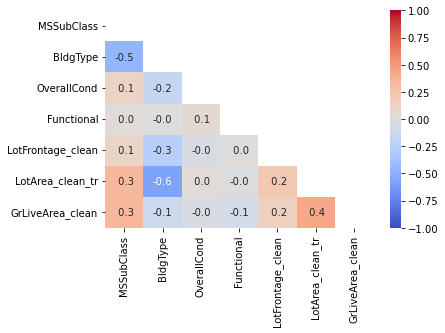

In [11]:
# Generating correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt=' .1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

* Highest positive correlation of 0.4 between GrLiveArea and LotArea.


### GrdSearchCV

In [13]:
def print_results(results):
    print(f'BEST PARAMS: {results.best_params_}')
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean,3)} (+/- { round(std*2, 3)}) for { params}')

In [20]:
# Conduct search for best params while running crosss-validation (GridSearchCV)

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 6, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

C:\Users\imran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


BEST PARAMS: {'max_depth': None, 'n_estimators': 128}
0.01 (+/- 0.011) for {'max_depth': 2, 'n_estimators': 8}
0.015 (+/- 0.009) for {'max_depth': 2, 'n_estimators': 16}
0.013 (+/- 0.011) for {'max_depth': 2, 'n_estimators': 32}
0.018 (+/- 0.013) for {'max_depth': 2, 'n_estimators': 64}
0.018 (+/- 0.009) for {'max_depth': 2, 'n_estimators': 128}
0.016 (+/- 0.009) for {'max_depth': 2, 'n_estimators': 256}
0.019 (+/- 0.006) for {'max_depth': 2, 'n_estimators': 512}
0.014 (+/- 0.015) for {'max_depth': 4, 'n_estimators': 8}
0.017 (+/- 0.007) for {'max_depth': 4, 'n_estimators': 16}
0.013 (+/- 0.013) for {'max_depth': 4, 'n_estimators': 32}
0.018 (+/- 0.009) for {'max_depth': 4, 'n_estimators': 64}
0.019 (+/- 0.009) for {'max_depth': 4, 'n_estimators': 128}
0.017 (+/- 0.013) for {'max_depth': 4, 'n_estimators': 256}
0.021 (+/- 0.014) for {'max_depth': 4, 'n_estimators': 512}
0.013 (+/- 0.013) for {'max_depth': 8, 'n_estimators': 8}
0.017 (+/- 0.013) for {'max_depth': 8, 'n_estimators': 16}


BEST PARAMS: {'max_depth': None, 'n_estimators': 128}

* With an accuracy rate of 2.4%, this is due to the fact that our Sale Price Label isn't rounded, so it will make it extremely difficult to predict an actual exact price. 

### GridSearchCV with rounded SalePrice

In [39]:
df = pd.read_csv('data/train.csv')
df['RoundedSalePrice'] = df['SalePrice'] //10000
train_labels_rounded = df['RoundedSalePrice'][:876].to_frame()

In [40]:
cv.fit(train_features, train_labels_rounded.values.ravel())

print_results(cv)

C:\Users\imran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


BEST PARAMS: {'max_depth': 4, 'n_estimators': 256}
0.065 (+/- 0.024) for {'max_depth': 2, 'n_estimators': 8}
0.08 (+/- 0.032) for {'max_depth': 2, 'n_estimators': 16}
0.082 (+/- 0.023) for {'max_depth': 2, 'n_estimators': 32}
0.075 (+/- 0.015) for {'max_depth': 2, 'n_estimators': 64}
0.078 (+/- 0.024) for {'max_depth': 2, 'n_estimators': 128}
0.076 (+/- 0.039) for {'max_depth': 2, 'n_estimators': 256}
0.081 (+/- 0.021) for {'max_depth': 2, 'n_estimators': 512}
0.072 (+/- 0.025) for {'max_depth': 4, 'n_estimators': 8}
0.065 (+/- 0.034) for {'max_depth': 4, 'n_estimators': 16}
0.08 (+/- 0.038) for {'max_depth': 4, 'n_estimators': 32}
0.073 (+/- 0.034) for {'max_depth': 4, 'n_estimators': 64}
0.084 (+/- 0.027) for {'max_depth': 4, 'n_estimators': 128}
0.089 (+/- 0.016) for {'max_depth': 4, 'n_estimators': 256}
0.078 (+/- 0.028) for {'max_depth': 4, 'n_estimators': 512}
0.061 (+/- 0.041) for {'max_depth': 8, 'n_estimators': 8}
0.076 (+/- 0.031) for {'max_depth': 8, 'n_estimators': 16}
0.06

 ### Feature Importance

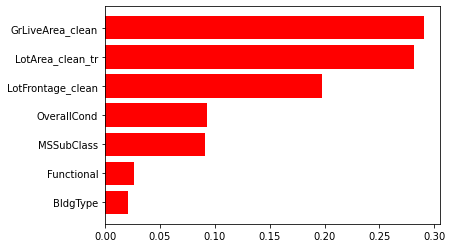

In [24]:
#Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

* GrLiveArea and LotArea are the most important features in determining price for a house.
* Surpringsigly the OverallCond doesn't play a pivotal role in determining price compared to the other features.


In [ ]:
# Write out the model fit on the whole training set